# **คณันสักก์ สุจารีย์ 163404140001 วต.3-1**

In [2]:
import cv2 as cv # import library opencv โดยย่อเป็น cv
import numpy as np # import library numpy โดยย่อเป็น np
from matplotlib import pyplot as plt # import library matplotlib ในส่วนย่อย pyplot โดยย่อเป็น plt
from google.colab.patches import cv2_imshow # import library google.colab.patches ในส่วนย่อย cv2_imshow

## Use cv.getStructuringElement()

In [3]:
rect3x3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
cross3x3 = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
ellipse3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
rect5x5 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
cross5x5 = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
ellipse5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
print(rect3x3)
print(cross3x3)
print(ellipse3x3)
print(rect5x5)
print(cross5x5)
print(ellipse5x5)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


## Load Circuit Image / Convert2Binary

In [4]:
!wget https://assets.gezdev.com/dip/BrokenText.png #ดาวน์โหลดภาพ

--2022-09-25 07:26:26--  https://assets.gezdev.com/dip/BrokenText.png
Resolving assets.gezdev.com (assets.gezdev.com)... 203.158.180.101
Connecting to assets.gezdev.com (assets.gezdev.com)|203.158.180.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85965 (84K) [image/png]
Saving to: ‘BrokenText.png’

BrokenText.png      100%[===================>]  83.95K   310KB/s    in 0.3s    

2022-09-25 07:26:27 (310 KB/s) - ‘BrokenText.png’ saved [85965/85965]



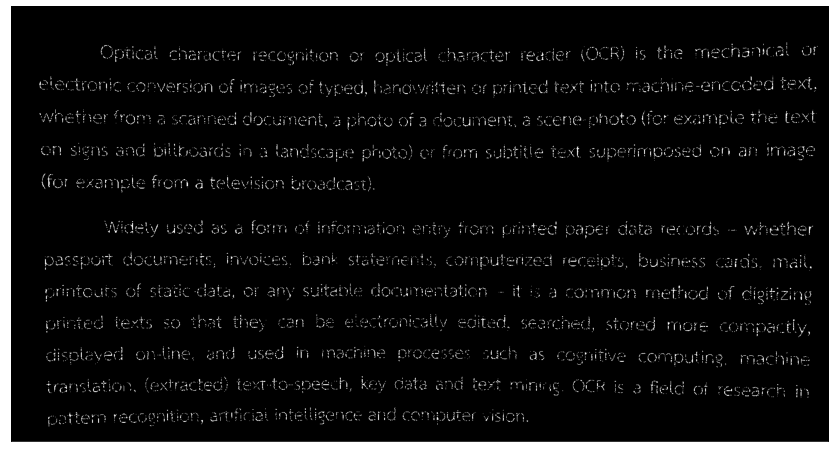

In [5]:
src = cv.imread("./BrokenText.png") #อ่านไฟล์ circles.png และเก็บในตัวแปร src
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY) # แปลงภาพเป็น BGR2GRAY
_,bin_img = cv.threshold(gray_img,127,255,cv.THRESH_BINARY)
plt.rcParams["figure.figsize"] = [15, 8]  #กำหนดขนาดภาพ 15x8
plt.imshow(bin_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

# Restore Text

In [6]:
rect3x3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
cross3x3 = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
ellipse3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
rect5x5 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
cross5x5 = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
ellipse5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
print(rect3x3)
print(cross3x3)
print(ellipse3x3)
print(rect5x5)
print(cross5x5)
print(ellipse5x5)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


In [7]:
dilated_rect5x5_img = cv.dilate(bin_img, rect5x5, iterations = 1)
dilated_cross5x5_img = cv.dilate(bin_img, cross5x5, iterations =1)
dilated_ellipse5x5_img = cv.dilate(bin_img, ellipse5x5, iterations = 1)

Result from dilated_rect5x5


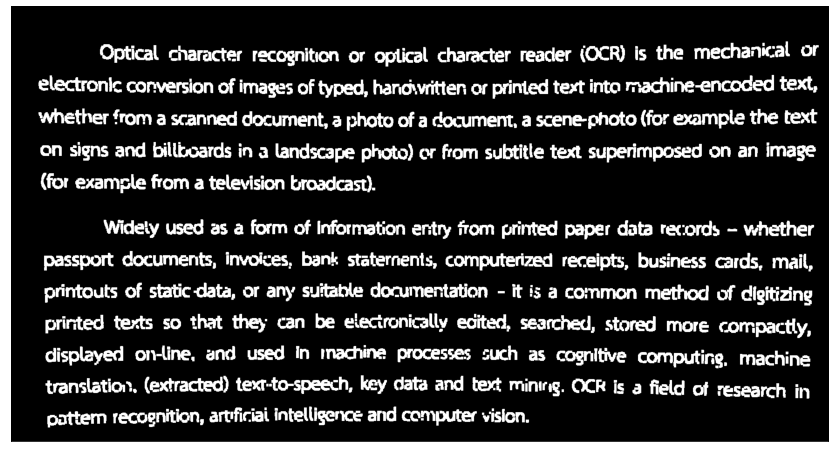

Result from dilated_cross5x5


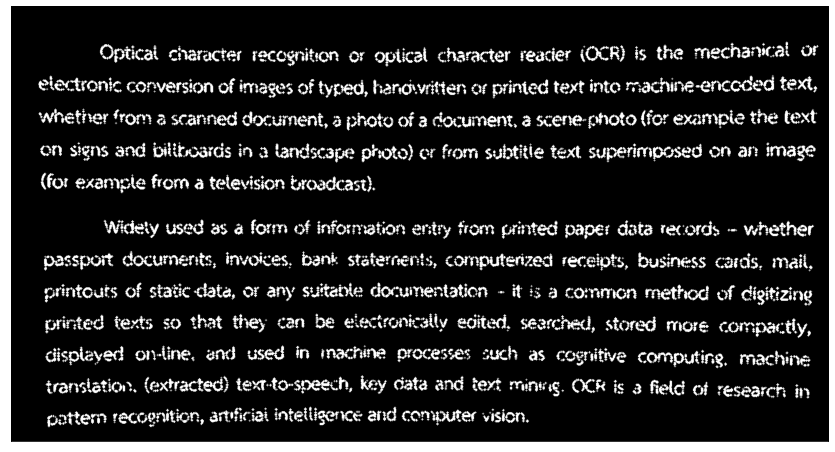

Result from dilated_ellipse5x5


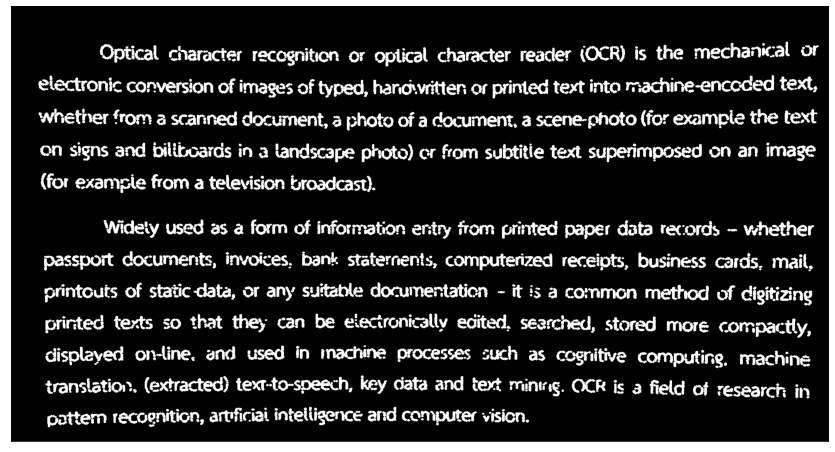

In [8]:
print("Result from dilated_rect5x5")
plt.imshow(dilated_rect5x5_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from dilated_cross5x5")
plt.imshow(dilated_cross5x5_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from dilated_ellipse5x5")
plt.imshow(dilated_ellipse5x5_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

จากการทดลองใช้วิธีการพอง 3แบบ

1. dilated_rect5x5 
2. dilated_cross5x5
3. dilated_ellipse5x5

โดยทั้ง 3แบบสามารถกู้คืนตัวหนังสือไม่ได้แบบ 100% เพราะยังมีตัวอักษรบางตัวที่มีบางส่วนที่ขาดหายไป แต่ก็พอที่จะสามารถอ่านได้